In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
sig = cv2.imread('signature.jpg',cv2.IMREAD_COLOR)

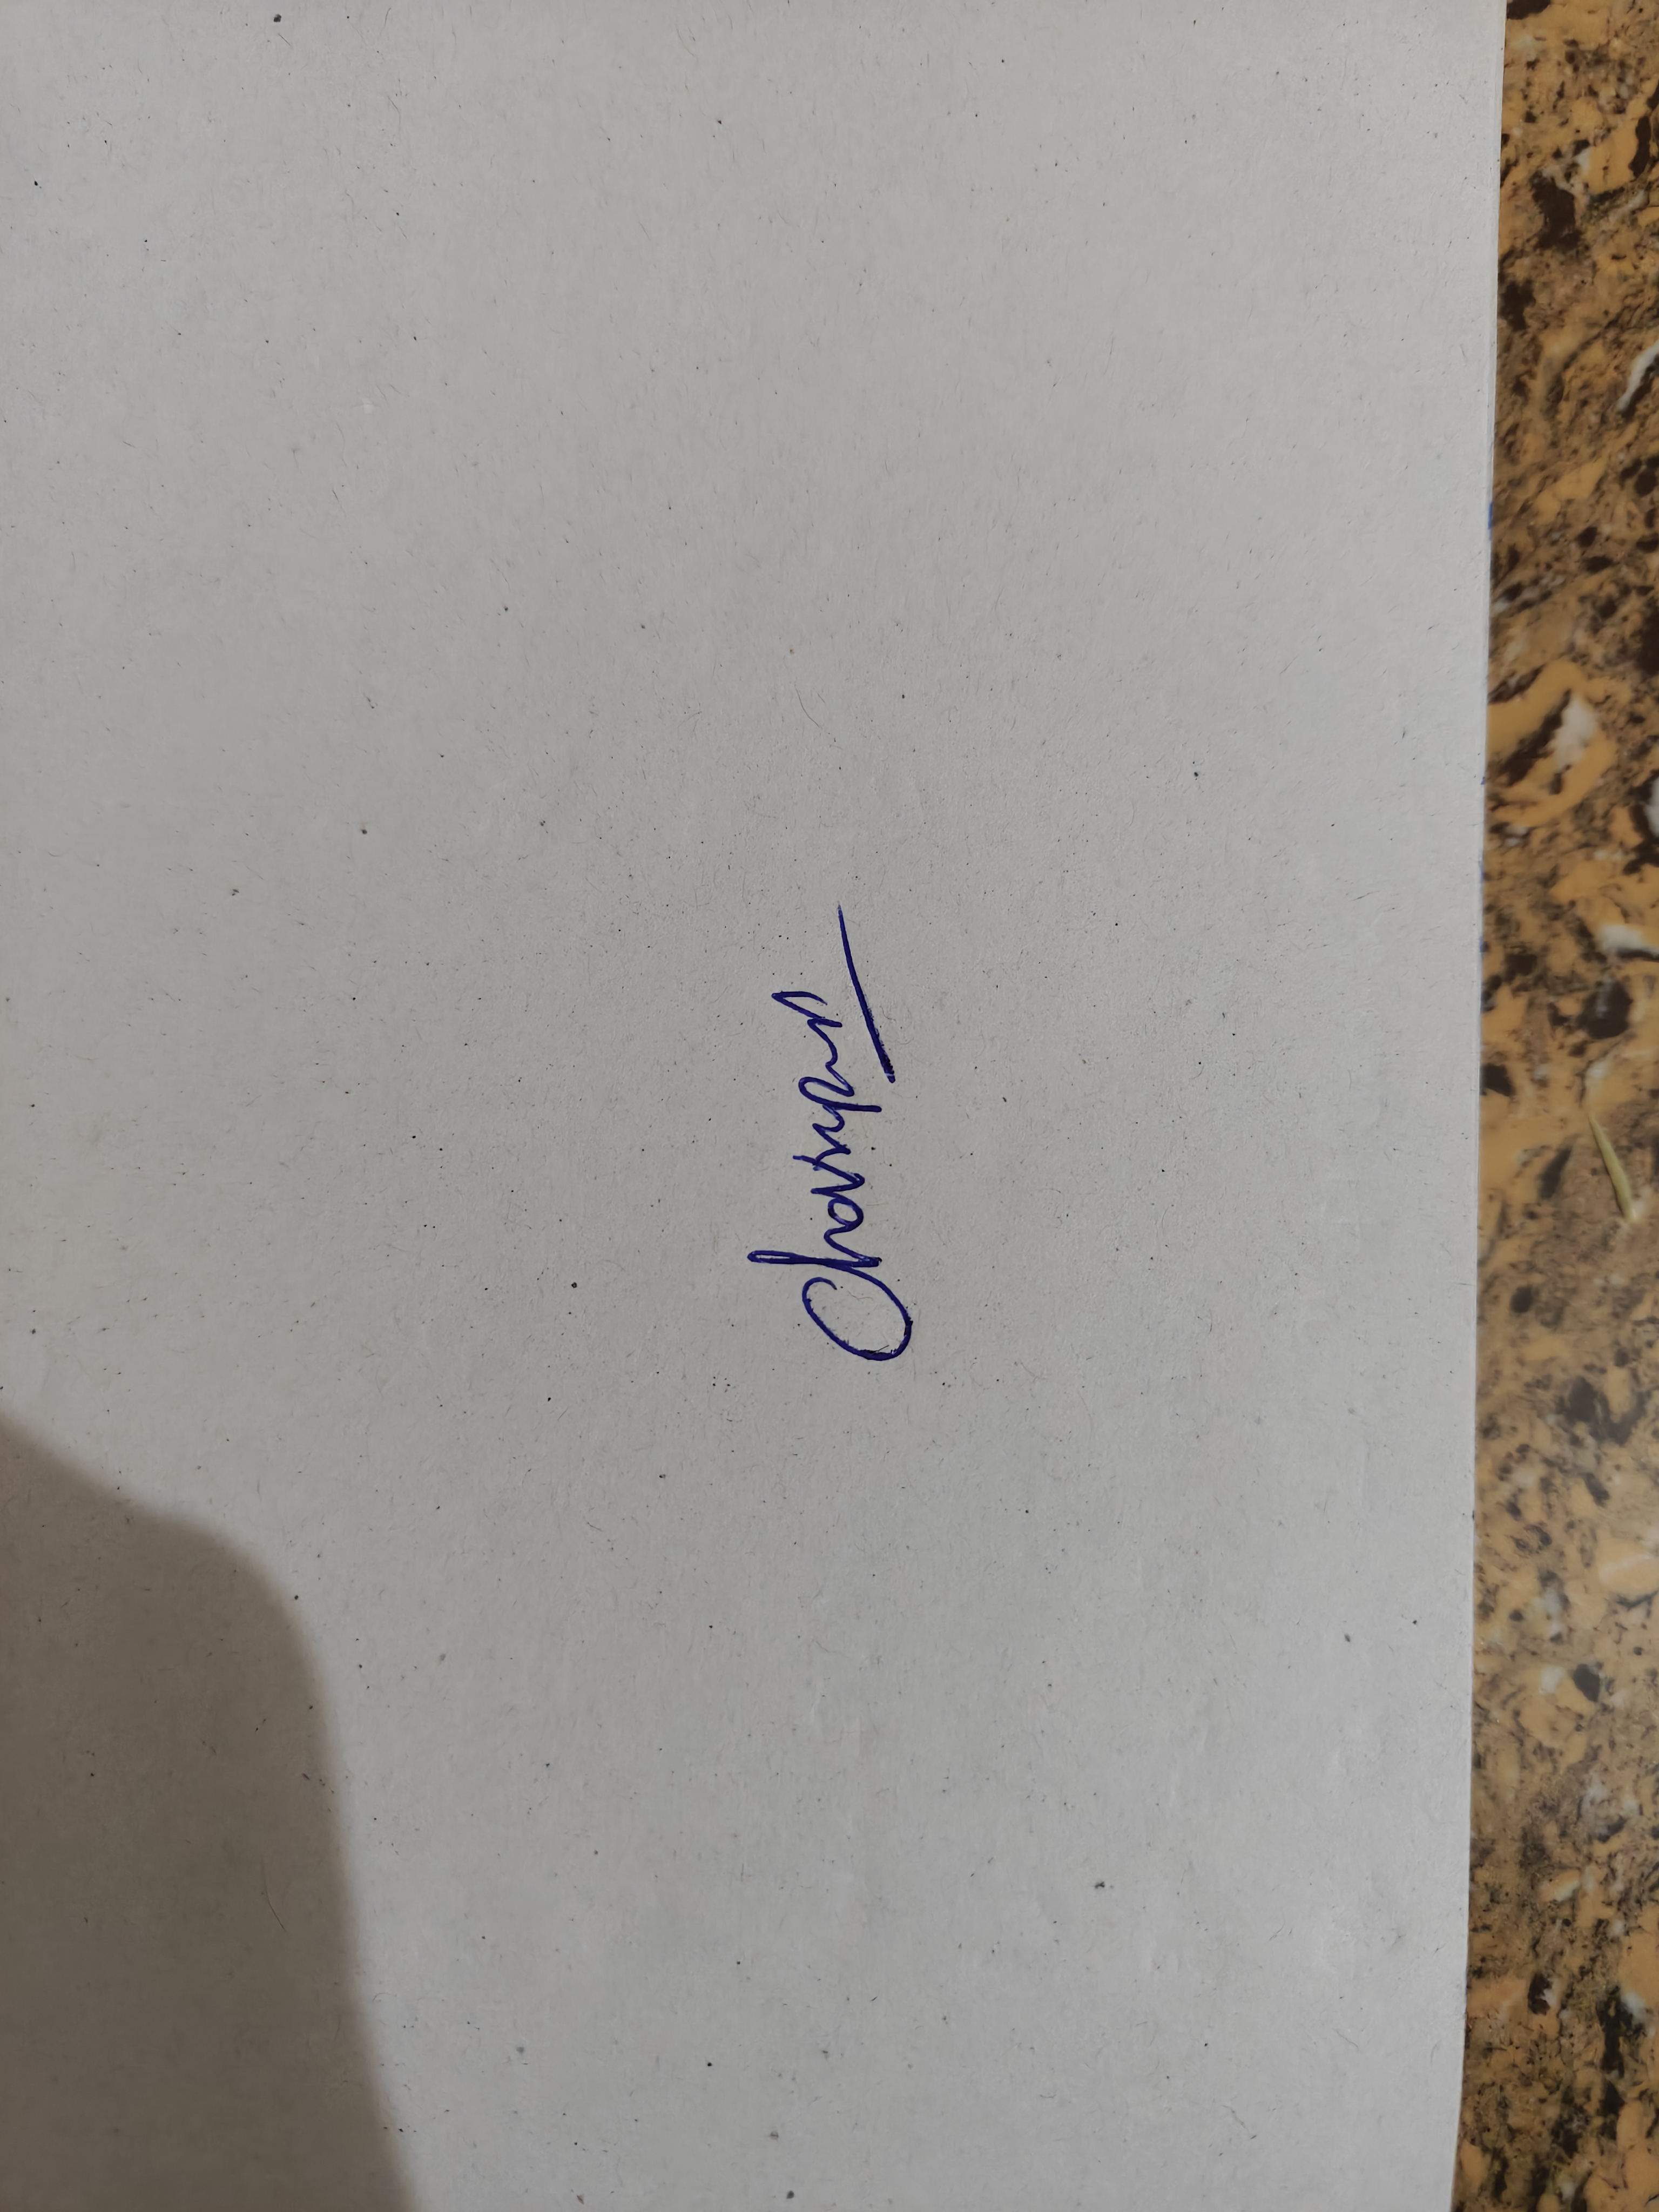

In [3]:
Image('signature.jpg',width='400')

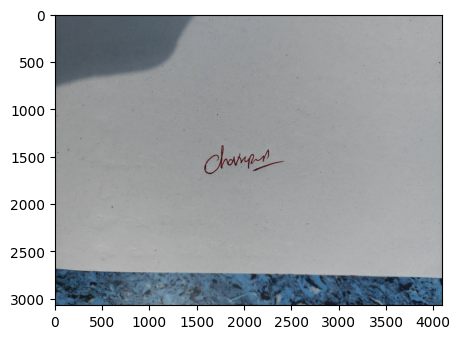

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(sig)

In [5]:
sig_crop = sig[1200:1800,1300:2800]

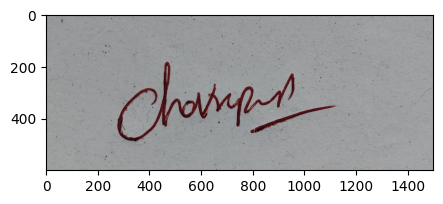

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(sig_crop)

In [7]:
sig_crop_ext = sig_crop[100:600,200:1200]

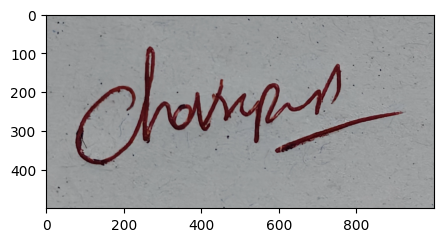

In [8]:
plt.figure(figsize=(5,5))
plt.imshow(sig_crop_ext)

In [9]:
sig_gray = cv2.cvtColor(sig_crop_ext,cv2.COLOR_BGR2GRAY)

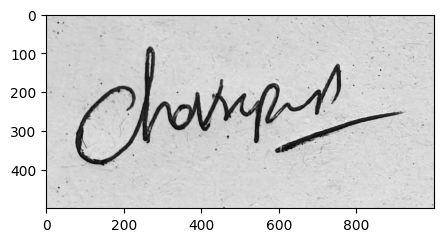

In [10]:
plt.figure(figsize=(5,5))
plt.imshow(sig_gray,cmap='gray')

In [11]:
retval,sig_binary = cv2.threshold(sig_gray,35,255,cv2.THRESH_BINARY_INV)

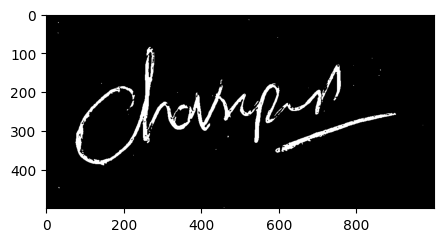

In [12]:
plt.figure(figsize=(5,5))
plt.imshow(sig_binary,cmap='gray')

In [13]:
retval_sec,sig_binary_sec = cv2.threshold(sig_binary,30,255,cv2.THRESH_BINARY)

In [19]:
sig_binary_adp = cv2.adaptiveThreshold(sig_binary,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,5,7)

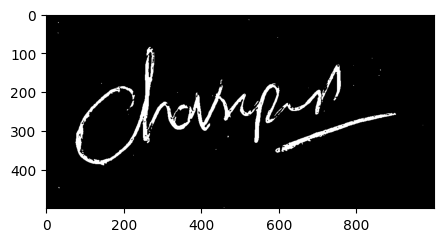

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(sig_binary_sec,cmap='gray')

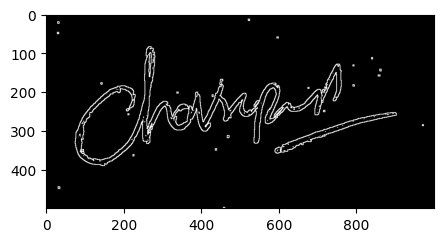

In [20]:
plt.figure(figsize=(5,5))
plt.imshow(sig_binary_adp,cmap='gray')

In [46]:
blue_layer = sig_crop_ext.copy()

In [47]:
blue_layer[:,:] = (255,0,0)

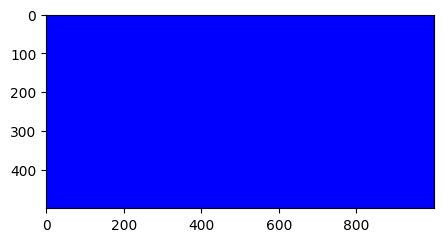

In [49]:
plt.figure(figsize=(5,5))
plt.imshow(blue_layer[:,:,::-1])

In [52]:
#Adding weight
transformed_sig = cv2.addWeighted(sig_crop_ext,1,blue_layer,0.5,0)

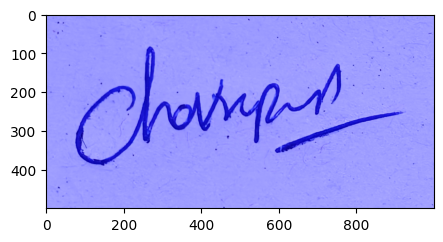

In [53]:
plt.figure(figsize=(5,5))
plt.imshow(transformed_sig[:,:,::-1])

In [58]:
b,g,r = cv2.split(transformed_sig)

In [59]:
mat = [b,g,r,sig_binary]

In [60]:
final_sig = cv2.merge(mat)

In [61]:
cv2.imwrite('enhanced_sig.png',final_sig)

True

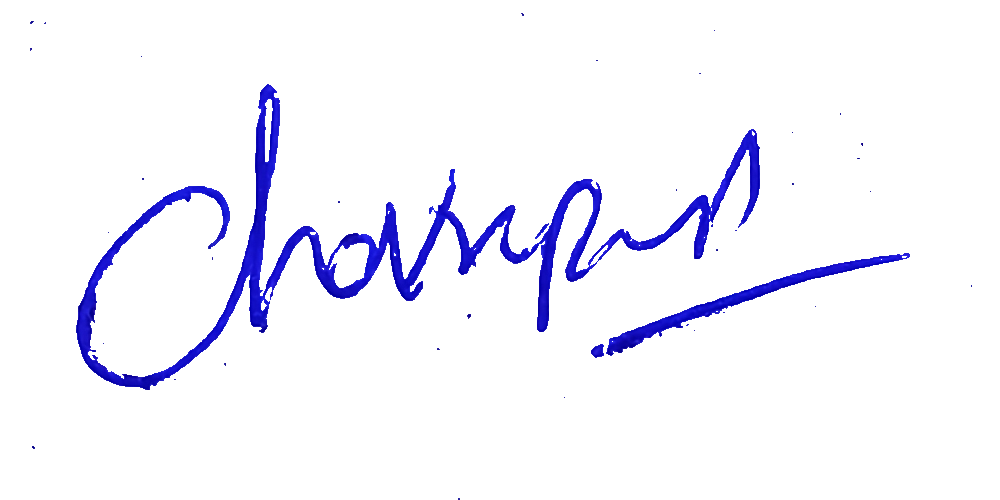

In [62]:
Image('enhanced_sig.png')

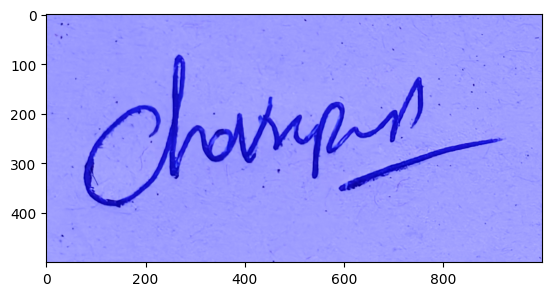

In [76]:
mat = [b,g,r,sig_binary]
final_sig_2 = cv2.merge(mat)
plt.imshow(final_sig_2[:,:,2::-1])